In [1]:
from env import *
from fonctions import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB

### Test generator

In [2]:
env = Env(10,10,0.6,0.2,[0.1,0.2,0.3,0.4])

In [3]:
cases=env.reset()

In [4]:
cases[:,:,0]

array([[1, 3, 4, 4, 4, 4, 0, 0, 3, 3],
       [4, 0, 0, 4, 4, 0, 3, 4, 3, 4],
       [3, 3, 2, 4, 0, 3, 0, 2, 2, 4],
       [4, 3, 2, 1, 3, 4, 2, 3, 2, 3],
       [3, 4, 3, 3, 0, 3, 1, 3, 0, 0],
       [0, 3, 2, 3, 4, 4, 4, 3, 0, 0],
       [2, 4, 4, 0, 4, 2, 4, 3, 4, 4],
       [3, 4, 4, 3, 3, 3, 2, 2, 0, 4],
       [3, 3, 2, 1, 4, 4, 4, 3, 4, 3],
       [0, 0, 4, 1, 3, 2, 2, 3, 1, 3]])

In [5]:
env.reward

array([[  -1,   -3,   -4,   -4,   -4,   -4,    0,    0,   -3,   -3],
       [  -4,    0,    0,   -4,   -4,    0,   -3,   -4,   -3,   -4],
       [  -3,   -3,   -2,   -4,    0,   -3,    0,   -2,   -2,   -4],
       [  -4,   -3,   -2,   -1,   -3,   -4,   -2,   -3,   -2,   -3],
       [  -3,   -4,   -3,   -3,    0,   -3,   -1,   -3,    0,    0],
       [   0,   -3,   -2,   -3,   -4,   -4,   -4,   -3,    0,    0],
       [  -2,   -4,   -4,    0,   -4,   -2,   -4,   -3,   -4,   -4],
       [  -3,   -4,   -4,   -3,   -3,   -3,   -2,   -2,    0,   -4],
       [  -3,   -3,   -2,   -1,   -4,   -4,   -4,   -3,   -4,   -3],
       [   0,    0,   -4,   -1,   -3,   -2,   -2,   -3,   -1, 1000]])

### Test value iteration

In [6]:
nb,v,policy=value_iteration(env,0.9,problem="equilibre")

[[  -1   -9   -2   -3   -3   -4    0    0   -9   -6]
 [  -5    0    0   -4   -9    0   -4   -8   -7   -9]
 [  -4   -3   -9   -9    0   -4    0   -2   -8   -9]
 [  -3   -6   -1   -1   -5   -6   -7   -8   -6   -4]
 [  -5   -1   -8   -2    0   -6   -7   -2    0    0]
 [   0   -4   -2   -8   -5   -8   -5   -2    0    0]
 [  -4   -7   -9    0   -9   -8   -1   -4   -7   -4]
 [  -6   -5   -8   -6   -8   -2   -4   -9    0   -8]
 [  -4   -7   -3   -4   -4   -4   -1   -8   -2   -7]
 [   0    0   -5   -5   -6   -1   -8   -4   -1 1000]]


In [7]:
dict_action={0:"O",1:"S",2:"W",3:"E"}

In [8]:
policy

array([[1., 3., 3., 1., 2., 2., 0., 0., 1., 1.],
       [1., 0., 0., 1., 2., 0., 3., 1., 1., 1.],
       [1., 3., 1., 1., 0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 3., 3., 1., 1., 1., 2., 2.],
       [3., 1., 3., 1., 0., 1., 1., 1., 0., 0.],
       [0., 3., 3., 3., 1., 3., 1., 1., 0., 0.],
       [1., 3., 1., 0., 3., 3., 1., 1., 3., 1.],
       [3., 3., 3., 3., 3., 3., 1., 1., 0., 1.],
       [3., 3., 3., 3., 3., 3., 3., 3., 1., 1.],
       [0., 0., 3., 3., 3., 3., 3., 3., 3., 0.]])

In [9]:
v

array([[147.16601534, 151.71855876, 170.79852468, 187.05802773,
        170.79852468, 153.56575715,   0.        ,   0.        ,
        259.60919876, 239.59336561],
       [169.07347067,   0.        ,   0.        , 218.4265595 ,
        193.28287984,   0.        , 292.14206205, 323.09359594,
        296.97779842, 270.46855877],
       [188.73954566, 205.4501751 , 230.98966271, 258.12280853,
          0.        , 323.40861789,   0.        , 368.41485007,
        339.08279948, 303.1022986 ],
       [209.20003042, 231.75297486, 258.54234676, 287.00700866,
        324.45223189, 368.0226282 , 401.52776075, 434.12059104,
        383.97074434, 331.09383981],
       [231.28728626, 260.40660184, 292.78722092, 327.57810776,
          0.        , 406.14700809, 454.42656876, 493.5052898 ,
          0.        ,   0.        ],
       [  0.        , 286.40104008, 321.09918429, 373.52100681,
        412.66061624, 456.656721  , 511.51926571, 561.1553083 ,
          0.        ,   0.        ],
       [28

### Test visualisation de politique

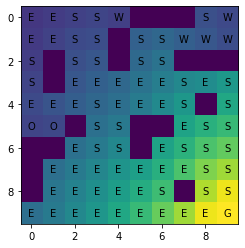

In [10]:
visu_policy(v,policy,dict_action,cases)

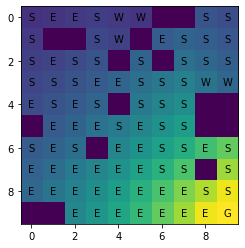

In [10]:
visu_policy(v,policy,dict_action,cases)

### Test programmation lineaire de politique mixte

In [18]:
p,v2=dual_pl_mono(env,0.9)

In [19]:
pn=normalise(p)

In [20]:
print(pn)

[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 1.]


In [16]:
pd=get_a_policy(pn)

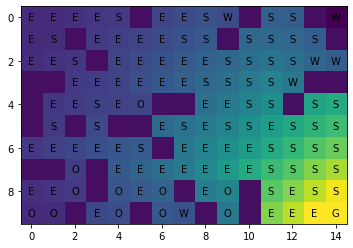

In [22]:
visu_policy(v,pd,dict_action,cases)